# Introduction

## "Feature Selection & Dimensionality Reduction"

The task is to predict online news article shares using various explanatory variables from a large dataset. Due to the high number of features, it's essential to select only the most relevant ones to improve model performance.

Team members :
- Mahesh Rajendra
- Mamatha Singh
- Bhavitha Bojja
- Nandini Srirapu

## Methodology / Plan

1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Preparation** : Checked for null values and droped outliners from the dataset.

3. **Exploratory Data Analysis** :
Analyzed vast dataset with univariate and bivariate analysis, examining statistical and visual patterns. Histograms and box plots are used to observe the distribution of numerical data, while count plots are applied for categorical data. Additionally, heatmaps, bar charts, and violin plots are generated to explore the relationships between variables after data cleaning.

4. **Feature Selection / Dimensionality Reduction** :
In this phase we used Backward selection method with p_value thrushold = 0.05 to retain best features and ploted graph showing AIM and R2 scores while droping each feature.

5. **Regression Model Evaluation** :
 We used Linear regression model with kfold cross validation evaluating performance metrics like R2 and Accuracy with retained features.

6. **Conclusions**:
 Concluded on feature selection, Backward selection and accuracy of regression model.

## Data summary



Here's a detailed breakdown of the dataset features:

### **1. URL and Time-Related Features**
- `url`: The URL of the article (non-predictive) — this is just an identifier, not used for prediction.
- `timedelta`: Number of days between the publication of the article and when the dataset was acquired — useful for tracking how the article performs over time.

### **2. Content-Based Features**
- `n_tokens_title`: Number of words in the article's title — longer or shorter titles may affect how catchy the article is.
- `n_tokens_content`: Number of words in the article's content — this captures how much information the article contains.
- `n_unique_tokens`: Rate of unique words in the content — a measure of vocabulary diversity.
- `n_non_stop_words`: Proportion of non-stop words (i.e., content words) in the article — articles with more meaningful words might be more engaging.
- `n_non_stop_unique_tokens`: Proportion of unique non-stop words — indicates how varied and content-rich the article is.

### **3. Link and Multimedia Features**
- `num_hrefs`: Number of hyperlinks in the article — could reflect how well-connected the article is with external sources.
- `num_self_hrefs`: Number of self-referencing links (links to other articles on the same website) — this may indicate whether the article promotes internal content.
- `num_imgs`: Number of images in the article — articles with more images may be more visually appealing and shareable.
- `num_videos`: Number of videos in the article — video content might affect engagement and sharing.

### **4. Text and Keywords Features**
- `average_token_length`: Average length of words in the article — longer words may indicate more complex content.
- `num_keywords`: Number of keywords assigned to the article in its metadata — articles with well-defined keywords may perform better in search engines and attract more traffic.

### **5. Data Channel (Topic) Features**
These features indicate the category or topic of the article. Only one of these will be `True` for each article.
- `data_channel_is_lifestyle`: Is the article in the Lifestyle category?
- `data_channel_is_entertainment`: Is the article in Entertainment?
- `data_channel_is_bus`: Is the article in Business?
- `data_channel_is_socmed`: Is the article about Social Media?
- `data_channel_is_tech`: Is the article about Technology?
- `data_channel_is_world`: Is the article about World news?

### **6. Keyword Sharing Metrics**
These features measure the shares of articles based on their keyword performance.
- `kw_min_min`, `kw_max_min`, `kw_avg_min`: Minimum, maximum, and average number of shares for the least popular keyword.
- `kw_min_max`, `kw_max_max`, `kw_avg_max`: Minimum, maximum, and average number of shares for the most popular keyword.
- `kw_min_avg`, `kw_max_avg`, `kw_avg_avg`: Minimum, maximum, and average number of shares for all keywords.

### **7. Self-Reference Features**
- `self_reference_min_shares`: Minimum shares of articles that were referenced by the article.
- `self_reference_max_shares`: Maximum shares of referenced articles.
- `self_reference_avg_sharess`: Average shares of referenced articles — these features help indicate whether popular internal references impact shares.

### **8. Publication Timing Features**
These features indicate whether the article was published on a specific day or on the weekend:
- `weekday_is_monday`, `weekday_is_tuesday`, ..., `weekday_is_sunday`: Booleans indicating the day of the week the article was published.
- `is_weekend`: Boolean indicating if the article was published on the weekend (Saturday or Sunday).

### **9. Latent Dirichlet Allocation (LDA) Features**
These features capture the closeness of the article to different topics generated using LDA, a topic modeling technique. Articles are scored based on their similarity to five topics (LDA_00 to LDA_04).
- `LDA_00`, `LDA_01`, `LDA_02`, `LDA_03`, `LDA_04`: Closeness to topics, useful for topic-based modeling.

### **10. Sentiment and Polarity Features**
These features measure the sentiment (positive/negative) and subjectivity (factual/opinion-based) of both the article's title and content:
- `global_subjectivity`: Overall subjectivity of the article's content (closer to 1 means more subjective, closer to 0 means more objective).
- `global_sentiment_polarity`: Overall sentiment polarity of the article (positive or negative).
- `global_rate_positive_words`: Proportion of positive words in the content.
- `global_rate_negative_words`: Proportion of negative words in the content.
- `rate_positive_words`: Proportion of positive words excluding neutral ones.
- `rate_negative_words`: Proportion of negative words excluding neutral ones.
- `avg_positive_polarity`: Average polarity of positive words (how positive they are).
- `min_positive_polarity`: Minimum polarity score among positive words.
- `max_positive_polarity`: Maximum polarity score among positive words.
- `avg_negative_polarity`: Average polarity of negative words (how negative they are).
- `min_negative_polarity`: Minimum polarity score among negative words.
- `max_negative_polarity`: Maximum polarity score among negative words.
- `title_subjectivity`: Subjectivity score of the title.
- `title_sentiment_polarity`: Sentiment polarity score of the title.
- `abs_title_subjectivity`: Absolute subjectivity level of the title.
- `abs_title_sentiment_polarity`: Absolute polarity level of the title.

### **11. Target Variable**
- `shares`: The number of shares the article received. This is the target variable that the dataset is trying to predict based on the above features.



In [326]:
import pandas as pd

In [327]:
data_url = 'https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/refs/heads/main/Newsshare_Data.csv'
df = pd.read_csv(data_url)
df.tail(10)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39634,http://mashable.com/2014/12/27/music-grid-outf...,9.0,9.0,251.0,0.666667,1.0,0.786164,21.0,13.0,9.0,...,0.250000,1.00,-0.558333,-1.00,-0.125000,0.000000,0.000000,0.500000,0.000000,1000
39635,http://mashable.com/2014/12/27/nike-marc-newson/,9.0,13.0,478.0,0.514039,1.0,0.641844,18.0,2.0,2.0,...,0.033333,1.00,-0.223611,-0.40,-0.050000,0.100000,0.000000,0.400000,0.000000,1300
39636,http://mashable.com/2014/12/27/north-korea-int...,8.0,8.0,2509.0,0.348878,1.0,0.464923,23.0,1.0,10.0,...,0.100000,1.00,-0.231612,-0.60,-0.050000,0.000000,0.000000,0.500000,0.000000,1700
39637,http://mashable.com/2014/12/27/nypd-rafael-ram...,8.0,13.0,1629.0,0.425711,1.0,0.606092,15.0,12.0,6.0,...,0.033333,1.00,-0.429534,-1.00,-0.050000,0.783333,-0.600000,0.283333,0.600000,1400
39638,http://mashable.com/2014/12/27/protests-contin...,8.0,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,...,0.214286,0.80,-0.250000,-0.25,-0.250000,0.000000,0.000000,0.500000,0.000000,1200
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.50,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.40,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.80,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.50,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.20,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [329]:
# check for null values
print(df.isnull().sum())

# As we could not see all columns
# print total count of null values
print(f" Total count of null values: {df.isnull().sum().sum()}")

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
 Total count of null values: 0


- No nulls in dataset



## Univariate Analysis

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [331]:
# function to plot histogram and box plots

def hist_box(df,col):
    """
    Plots a histogram and box plot for a specified column in a DataFrame.

    Args:
      df: The DataFrame containing the data.
      col: The name of the column to plot.
  """
    fig, axes = plt.subplots(1, 2, figsize=(7, 4))

    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(f"{col}")
    axes[0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(f"{col}")

    plt.tight_layout()
    plt.show()

- Noticed that there is a leading spaces for every column name in the dataset.

In [332]:
# Remove leading and trailing spaces from the column names
df.columns = df.columns.str.strip()

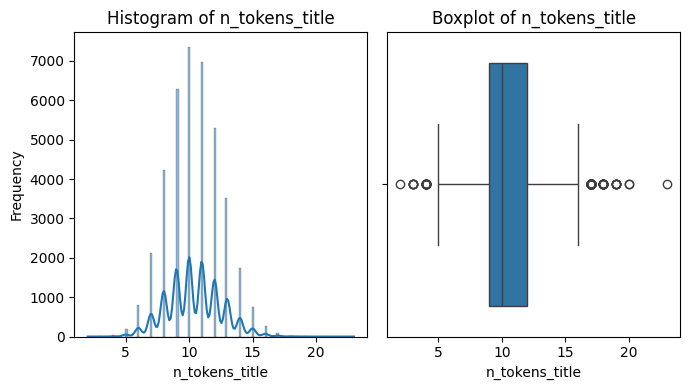

,n_tokens_title
count,39644.000000
mean,10.398749
std,2.114037
min,2.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,23.000000


In [333]:
# plot histogram and box plot
hist_box(df, 'n_tokens_title')

# describe statistics
df['n_tokens_title'].describe()

The "n_tokens_title"( Number of words in the article's title) data is centered around 10 tokens, with a moderate spread and a few outliers. Most titles have around 10 tokens, but there are some that are significantly longer or shorter. The box plot shows the middle 50% of the data and the outliers

In [334]:
cols = df.columns
cols

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

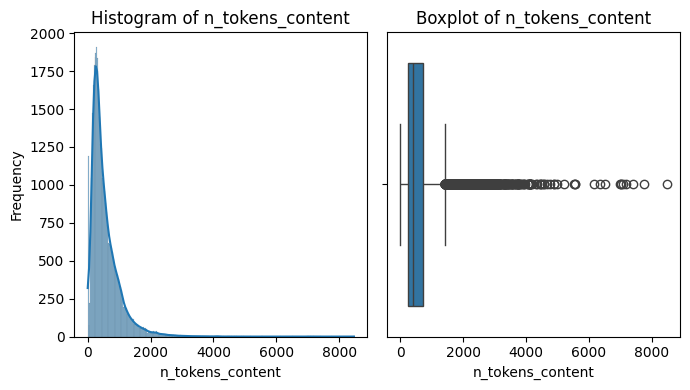

,n_tokens_content
count,39644.000000
mean,546.514731
std,471.107508
min,0.000000
25%,246.000000
50%,409.000000
75%,716.000000
max,8474.000000


In [335]:
# plot histogram and box plot
hist_box(df, 'n_tokens_content')

# describe statistics
df['n_tokens_content'].describe()

The "n_tokens_content"(Number of words in the article's content) data is heavily skewed to the right.Most of the data points are concentrated in the lower range.The box plot also confirms the presence of outliers and provides a summary of the distribution.

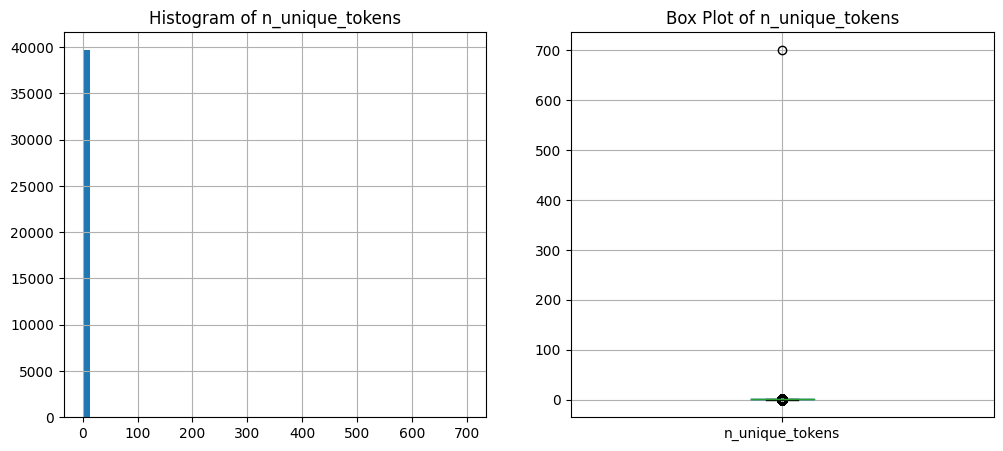

,n_unique_tokens
count,39644.000000
mean,0.548216
std,3.520708
min,0.000000
25%,0.470870
50%,0.539226
75%,0.608696
max,701.000000


In [336]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['n_unique_tokens'].hist(bins=50, ax=axes[0])
axes[0].set_title('Histogram of n_unique_tokens')

# Plot boxplot on the second subplot (axes[1])
df[['n_unique_tokens']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of n_unique_tokens')

plt.show()

df['n_unique_tokens'].describe()

The "n_unique_tokens"(Rate of unique words in the content) data is heavily skewed to the right, with most values concentrated around 0 and a few very large outliers. The box plot shows the middle 50% of the data and the outliers.

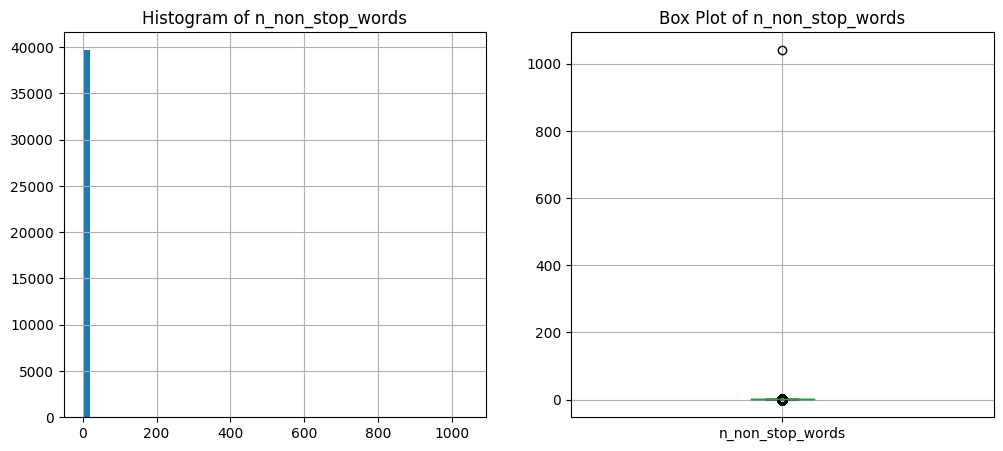

,n_non_stop_words
count,39644.000000
mean,0.996469
std,5.231231
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1042.000000


In [337]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['n_non_stop_words'].hist(bins=50, ax=axes[0])
axes[0].set_title('Histogram of n_non_stop_words')

# Plot boxplot on the second subplot (axes[1])
df[['n_non_stop_words']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of n_non_stop_words')

plt.show()

df['n_non_stop_words'].describe()

- The "n_non_stop_words"(Proportion of non-stop words (i.e., content words) in the article) data is heavily skewed to the right, with most values concentrated around 0 and a few large outliers. The summary statistics support this observation, showing a high standard deviation (0.52678) and a wide range of values (from 0 to 6.68696).

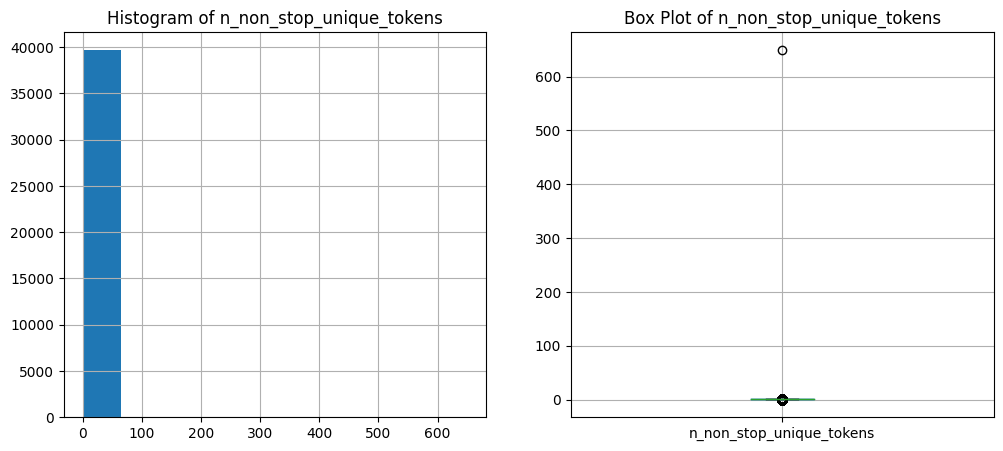

,n_non_stop_unique_tokens
count,39644.000000
mean,0.689175
std,3.264816
min,0.000000
25%,0.625739
50%,0.690476
75%,0.754630
max,650.000000


In [338]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['n_non_stop_unique_tokens'].hist( ax=axes[0])
axes[0].set_title('Histogram of n_non_stop_unique_tokens')

# Plot boxplot on the second subplot (axes[1])
df[['n_non_stop_unique_tokens']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of n_non_stop_unique_tokens')

plt.show()

df['n_non_stop_unique_tokens'].describe()

- The distribution of n_non_stop_unique_tokens(Proportion of unique non-stop words) is highly right-skewed, with most observations clustering around 0 to 100.
- The box plot shows an extreme outlier above 600, highlighting the skewness

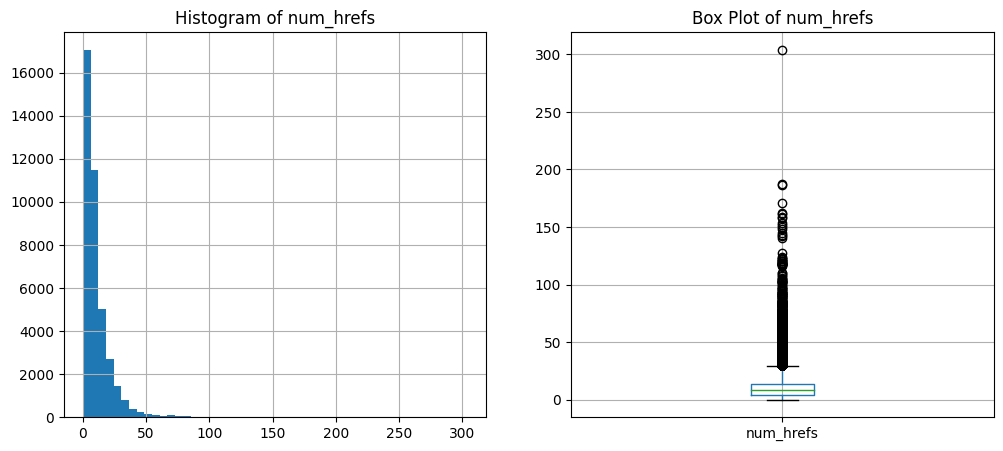

,num_hrefs
count,39644.000000
mean,10.883690
std,11.332017
min,0.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,304.000000


In [339]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['num_hrefs'].hist(bins=50, ax=axes[0])
axes[0].set_title('Histogram of num_hrefs')

# Plot boxplot on the second subplot (axes[1])
df[['num_hrefs']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of num_hrefs')

plt.show()

df['num_hrefs'].describe()

The distribution of the num_hrefs(Number of hyperlinks in the article ) variable appears to be right-skewed, with most observations falling between 0 and 20. The median is around a low value, with a few extreme outliers reaching up to 300.

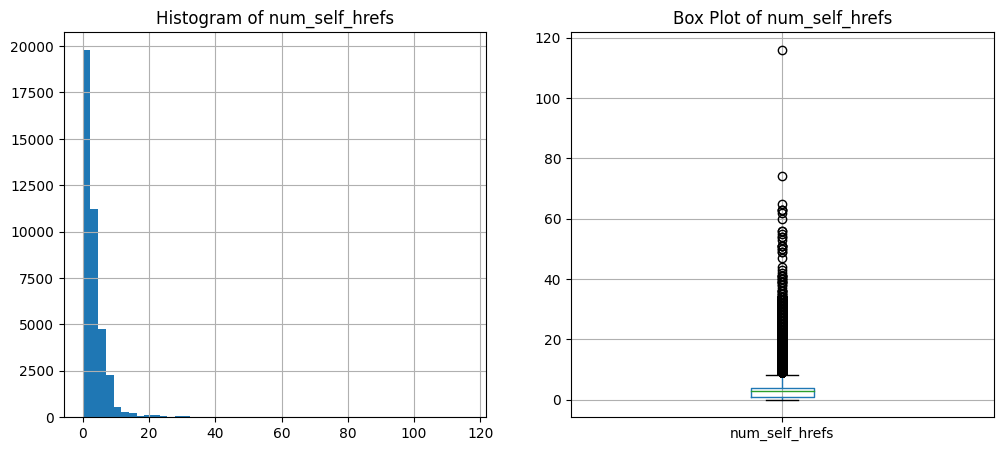

,num_self_hrefs
count,39644.000000
mean,3.293638
std,3.855141
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,116.000000


In [340]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['num_self_hrefs'].hist(bins=50, ax=axes[0])
axes[0].set_title('Histogram of num_self_hrefs')

# Plot boxplot on the second subplot (axes[1])
df[['num_self_hrefs']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of num_self_hrefs')

plt.show()

df['num_self_hrefs'].describe()

The distribution of num_self_hrefs(Number of self-referencing links (links to other articles on the same website)) is heavily right-skewed, with most values concentrated below 10. The median is around 3, while the range extends from 0 to about 120, indicating the presence of outliers.

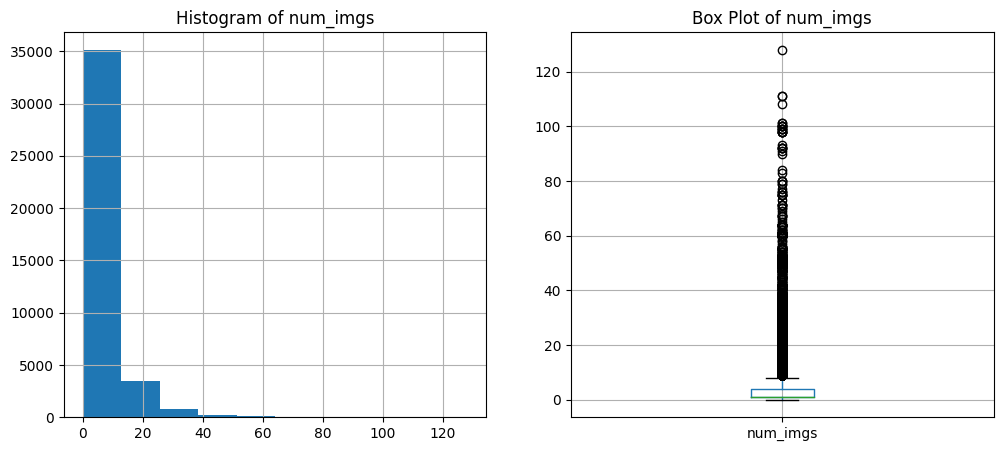

,num_imgs
count,39644.000000
mean,4.544143
std,8.309434
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,128.000000


In [341]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['num_imgs'].hist( ax=axes[0])
axes[0].set_title('Histogram of num_imgs')

# Plot boxplot on the second subplot (axes[1])
df[['num_imgs']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of num_imgs')

plt.show()

df['num_imgs'].describe()

The distribution of the num_imgs(Number of images in the article) variable is highly right-skewed, with most observations concentrated between 0 and 10.
The median is low, with several outliers extending beyond 100.

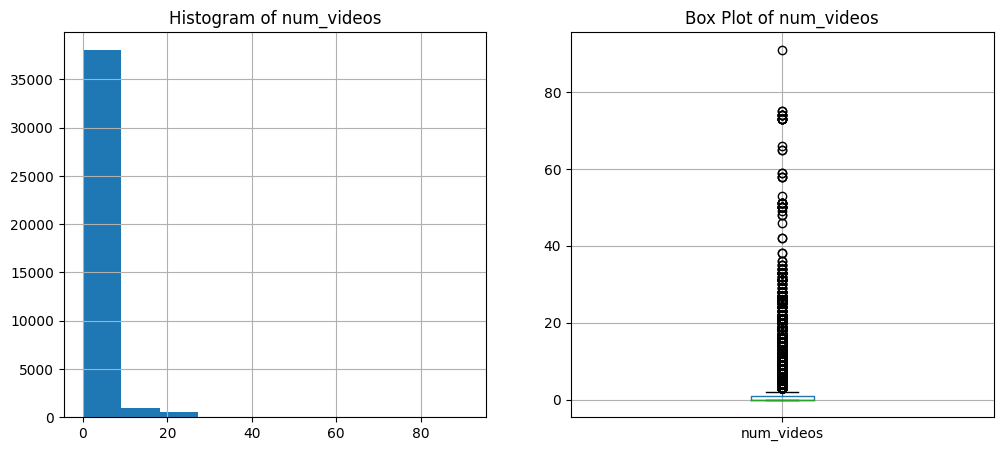

,num_videos
count,39644.000000
mean,1.249874
std,4.107855
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,91.000000


In [342]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['num_videos'].hist(ax=axes[0])
axes[0].set_title('Histogram of num_videos')

# Plot boxplot on the second subplot (axes[1])
df[['num_videos']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of num_videos')

plt.show()

df['num_videos'].describe()

The distribution of num_videos is highly right-skewed, with most values clustered below 5.
The mean is about 1.25, and the presence of outliers extends the range up to over 80.

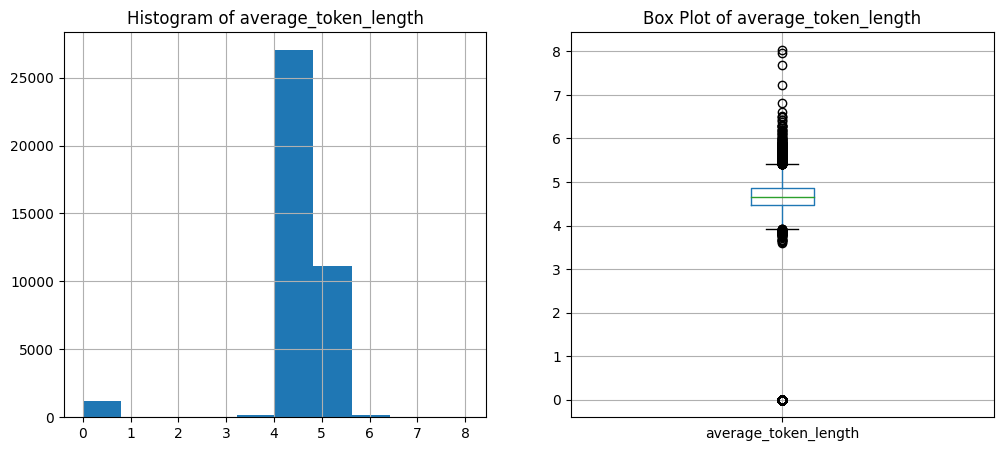

,average_token_length
count,39644.000000
mean,4.548239
std,0.844406
min,0.000000
25%,4.478404
50%,4.664082
75%,4.854839
max,8.041534


In [343]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['average_token_length'].hist( ax=axes[0])
axes[0].set_title('Histogram of average_token_length')

# Plot boxplot on the second subplot (axes[1])
df[['average_token_length']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of average_token_length')

plt.show()

df['average_token_length'].describe()

The distribution of average token length is right-skewed, with most observations clustered around 4 to 5.
The median token length appears to be around 4 units, with several outliers extending beyond 6 units.



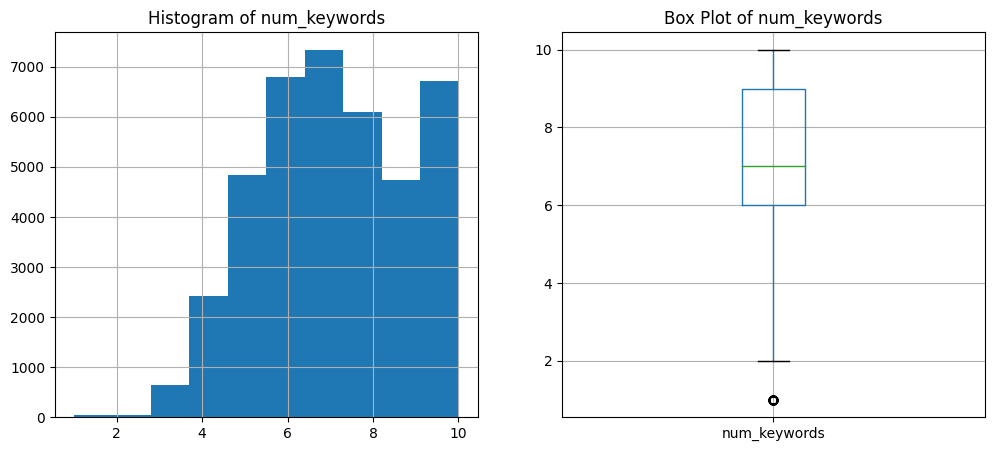

,num_keywords
count,39644.000000
mean,7.223767
std,1.909130
min,1.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,10.000000


In [344]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['num_keywords'].hist( ax=axes[0])
axes[0].set_title('Histogram of num_keywords')

# Plot boxplot on the second subplot (axes[1])
df[['num_keywords']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of num_keywords')

plt.show()

df['num_keywords'].describe()

The distribution of the number of keywords is approximately uniform, with most values between 6 and 9.
The median number of keywords is around 7, with a few lower outliers near 2.

In [345]:
# Select data channel columns
data_channels = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
                    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']]
# Reshape the data into a long format
df_melted_channels = pd.melt(data_channels, var_name='data_channel', value_name='count')
df_melted_channels

,data_channel,count
0,data_channel_is_lifestyle,0.0
1,data_channel_is_lifestyle,0.0
2,data_channel_is_lifestyle,0.0
3,data_channel_is_lifestyle,0.0
4,data_channel_is_lifestyle,0.0
...,...,...
237859,data_channel_is_world,0.0
237860,data_channel_is_world,0.0
237861,data_channel_is_world,0.0
237862,data_channel_is_world,1.0


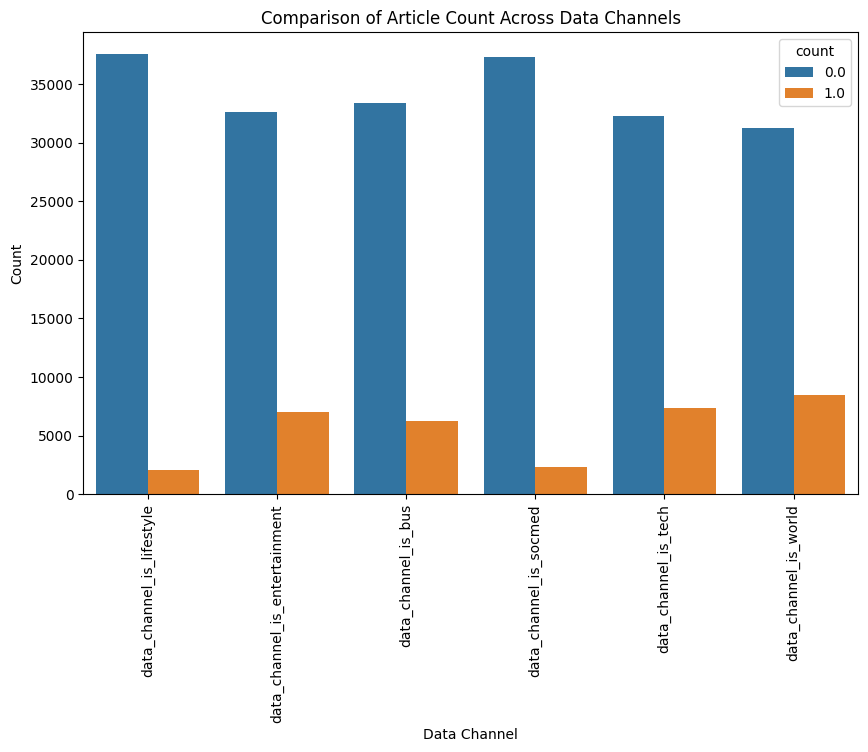

In [346]:

# Plot grouped countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted_channels, x='data_channel', hue='count')
plt.title('Comparison of Article Count Across Data Channels')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- The distribution across data channels shows most articles concentrated in world news, entertainment, business, and technology channels.
- Categories like lifestyle and social media shows relatively fewer articles.

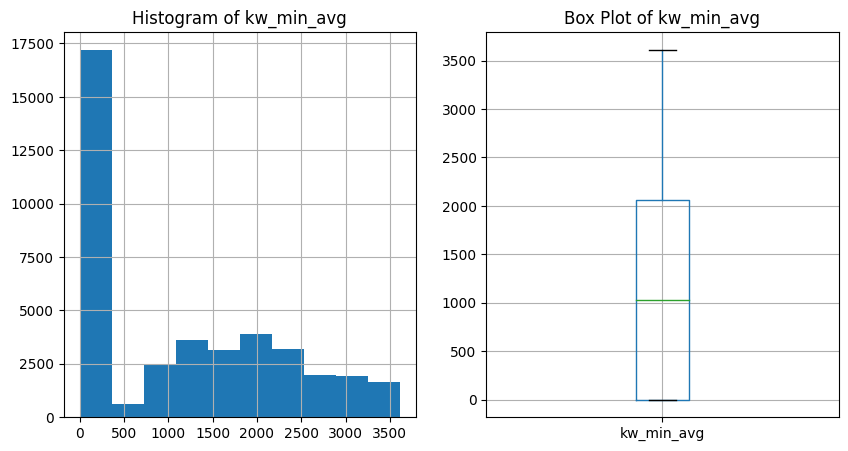

,kw_min_avg
count,39644.000000
mean,1117.146610
std,1137.456951
min,-1.000000
25%,0.000000
50%,1023.635611
75%,2056.781032
max,3613.039819


In [347]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram on the first subplot (axes[0])
df['kw_min_avg'].hist(ax=axes[0])
axes[0].set_title('Histogram of kw_min_avg')

# Plot boxplot on the second subplot (axes[1])
df[['kw_min_avg']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of kw_min_avg')

plt.show()

df['kw_min_avg'].describe()

The kw_min_avg variable is right-skewed, with most values falling below 500.
The box plot shows a median around 1000, with values ranging from 0 to approximately 3500, indicating a wide spread of data.

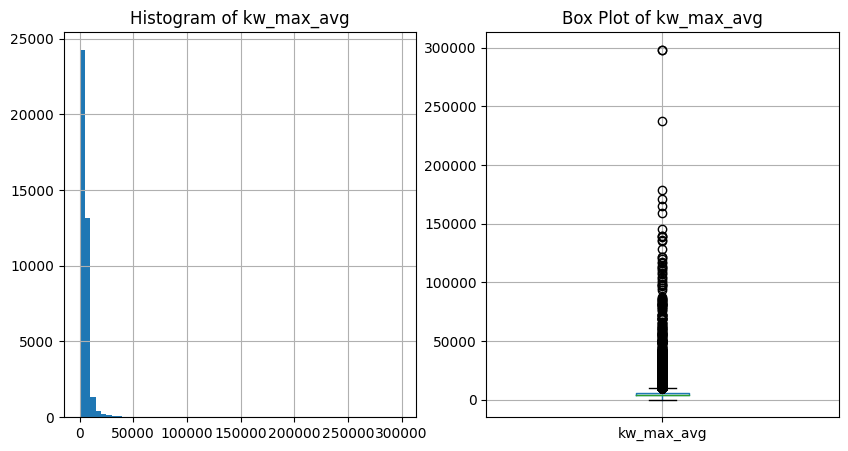

,kw_max_avg
count,39644.000000
mean,5657.211151
std,6098.871957
min,0.000000
25%,3562.101631
50%,4355.688836
75%,6019.953968
max,298400.000000


In [348]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram on the first subplot (axes[0])
df['kw_max_avg'].hist(bins=60, ax=axes[0])
axes[0].set_title('Histogram of kw_max_avg')

# Plot boxplot on the second subplot (axes[1])
df[['kw_max_avg']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of kw_max_avg')

plt.show()

df['kw_max_avg'].describe()

The distribution of kw_max_avg (maximum number of shares)is highly right-skewed, with the majority of observations concentrated below 10,000 units.
The box plot highlights a median value close to 1,500 units, while outliers extend up to over 300,000 units.

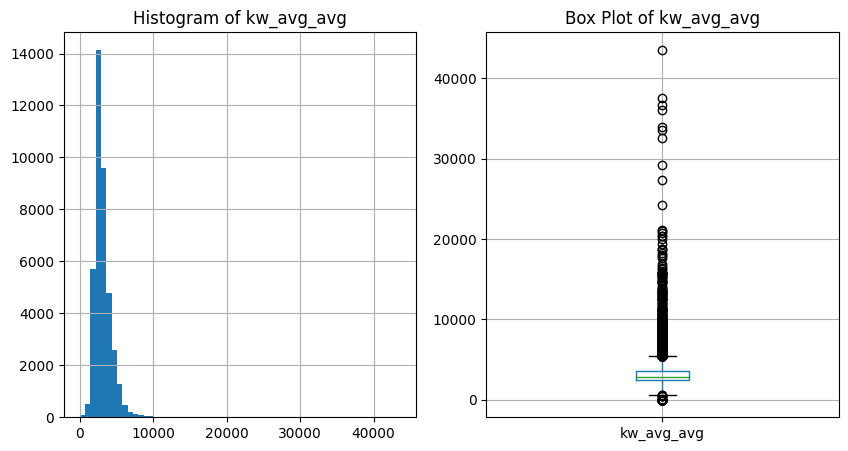

,kw_avg_avg
count,39644.000000
mean,3135.858639
std,1318.150397
min,0.000000
25%,2382.448566
50%,2870.074878
75%,3600.229564
max,43567.659946


In [349]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram on the first subplot (axes[0])
df['kw_avg_avg'].hist(bins=60, ax=axes[0])
axes[0].set_title('Histogram of kw_avg_avg')

# Plot boxplot on the second subplot (axes[1])
df[['kw_avg_avg']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of kw_avg_avg')

plt.show()

df['kw_avg_avg'].describe()

The distribution of kw_avg_avg(average number of shares)is right-skewed, with most observations falling below 10,000 units.
The box plot shows a median value of around 1,500 units, with many extreme outliers reaching above 40,000 units.

In [350]:
# Select the relevant columns for days of the week
days_columns = df[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
                   'weekday_is_thursday', 'weekday_is_friday',
                   'is_weekend']]
# Reshape the data into a long format
df_melted_days = pd.melt(days_columns, var_name='day_of_week', value_name='count')
df_melted_days

,day_of_week,count
0,weekday_is_monday,1.0
1,weekday_is_monday,1.0
2,weekday_is_monday,1.0
3,weekday_is_monday,1.0
4,weekday_is_monday,1.0
...,...,...
237859,is_weekend,0.0
237860,is_weekend,0.0
237861,is_weekend,0.0
237862,is_weekend,0.0


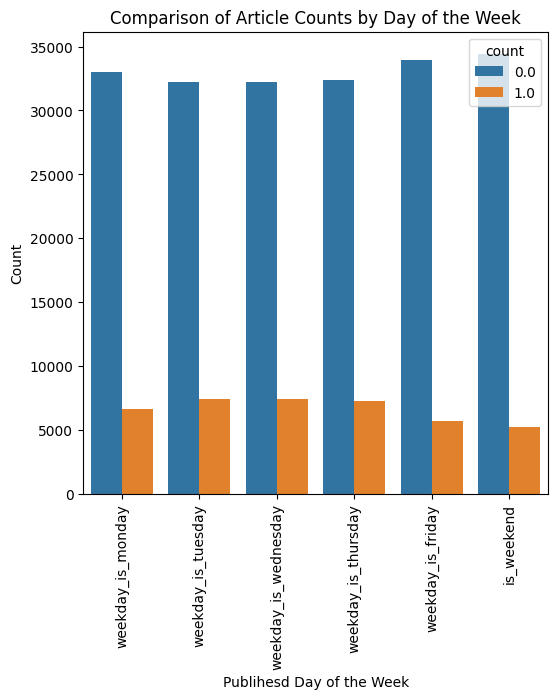

In [351]:
# Plot using a grouped countplot
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_melted_days, x='day_of_week', hue='count')
plt.title('Comparison of Article Counts by Day of the Week')
plt.xlabel('Publihesd Day of the Week')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.show()


- The bar chart compares article counts published on weekdays versus weekends. It shows that significantly more articles are published on weekdays compared to weekends, with a relatively consistent distribution across all weekdays.

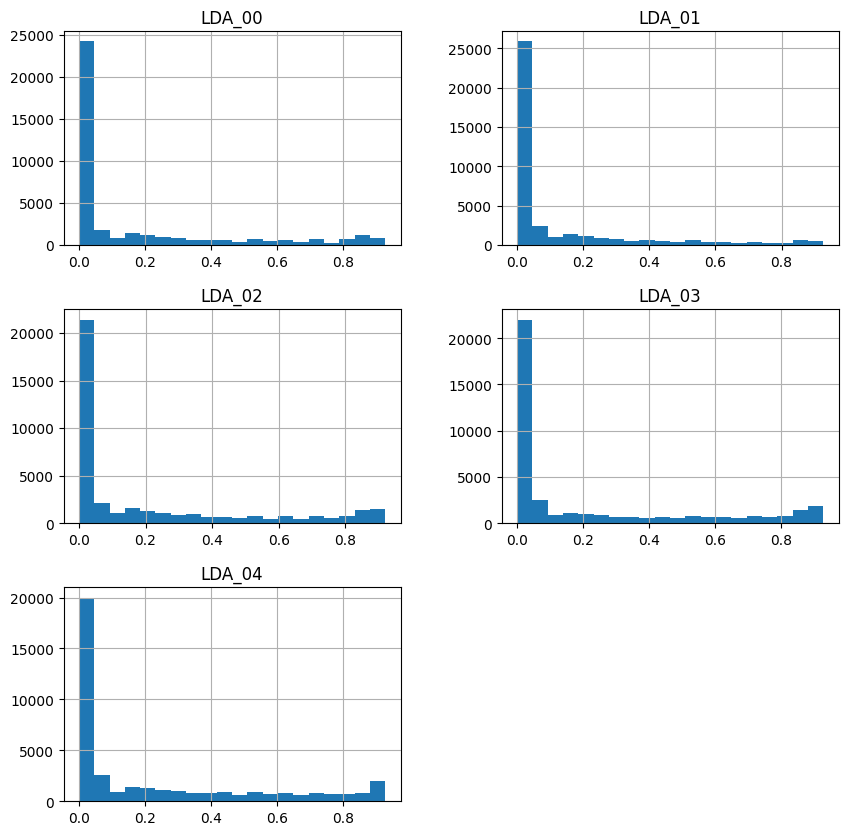

In [352]:
df[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].hist(figsize=(10,10), bins=20)
plt.show()

- **LDA_00, LDA_01, LDA_02, LDA_03, LDA_04**: These represent the article’s closeness or association with five different LDA topics. Each article has a score for each of these topics, indicating how strongly it is related to each one.
- we can see similar distribution overall.

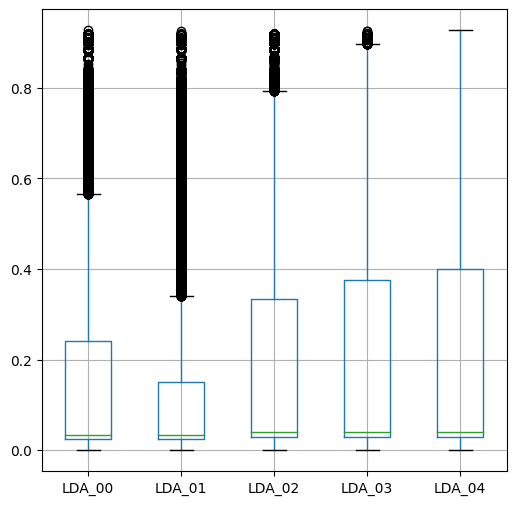

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.184599,0.141256,0.216321,0.223770,0.234029
std,0.262975,0.219707,0.282145,0.295191,0.289183
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025051,0.025012,0.028571,0.028571,0.028574
50%,0.033387,0.033345,0.040004,0.040001,0.040727
75%,0.240958,0.150831,0.334218,0.375763,0.399986
max,0.926994,0.925947,0.919999,0.926534,0.927191


In [353]:
df[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].boxplot(figsize=(6,6))
plt.show()

df[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].describe()

The box plots for the LDA topics (LDA_00 to LDA_04) show a wide range of distributions, with most median values near zero and significant variation among the upper quartiles.
Each plot indicates the presence of many outliers, particularly in LDA_00, LDA_01, and LDA_02, with values extending above 0.8.


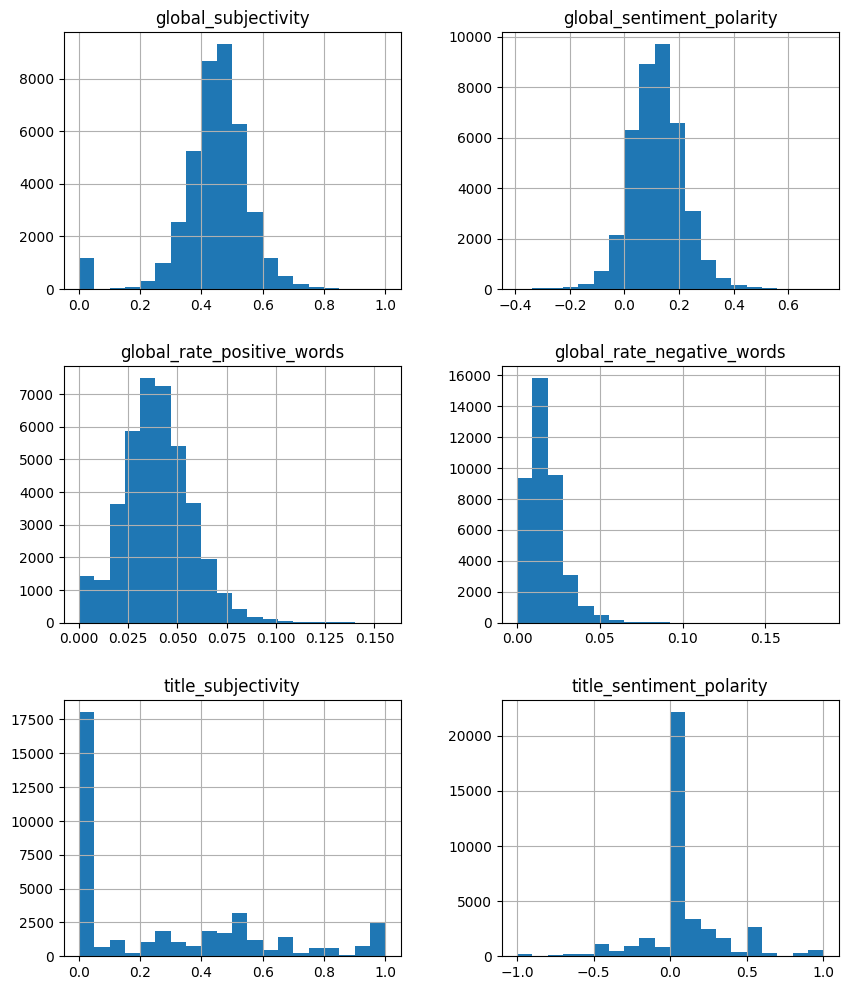

In [354]:
# Select and plot histogram for Sentiment and Polarity Features
df[['global_subjectivity','global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity',]].hist(figsize=(10,12), bins=20)
plt.show()

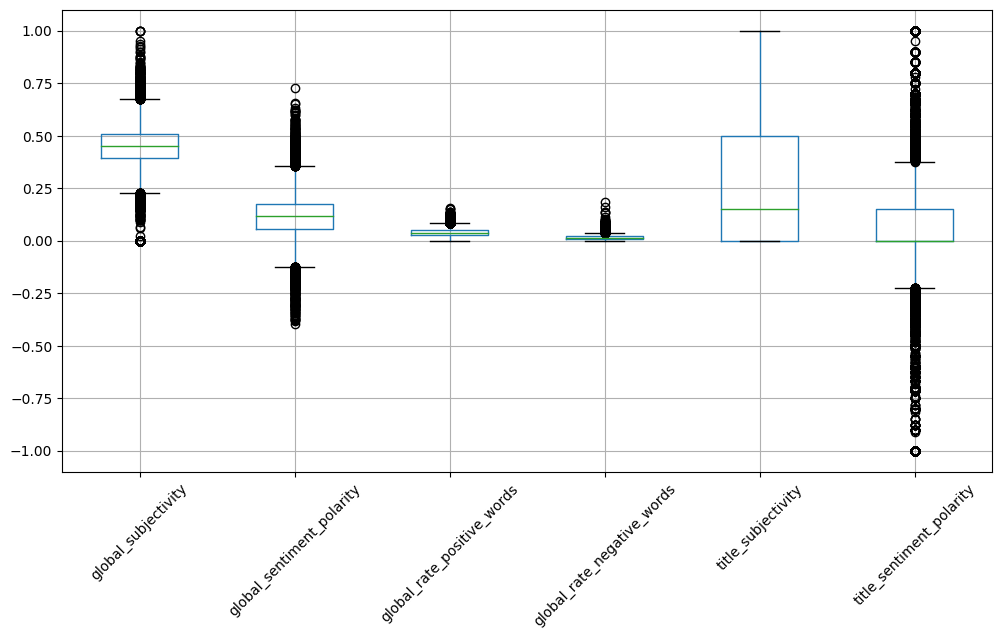

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.443370,0.119309,0.039625,0.016612,0.282353,0.071425
std,0.116685,0.096931,0.017429,0.010828,0.324247,0.265450
min,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000
25%,0.396167,0.057757,0.028384,0.009615,0.000000,0.000000
50%,0.453457,0.119117,0.039023,0.015337,0.150000,0.000000
75%,0.508333,0.177832,0.050279,0.021739,0.500000,0.150000
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000


In [355]:
# Select and plot box for Sentiment and Polarity Features
df[['global_subjectivity','global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity',]].boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.show()

df[['global_subjectivity','global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity',]].describe()

The variables show varied distributions, with most median values near zero, while some, like global_subjectivity and rate_positive_words, are concentrated around 0.25.

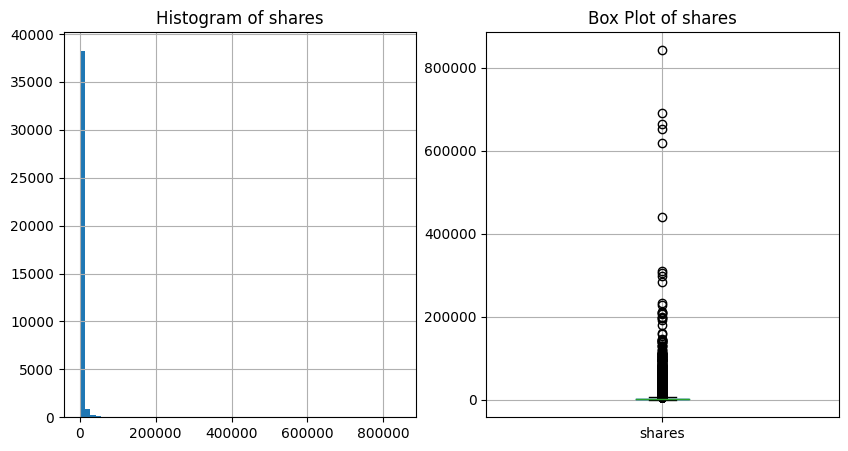

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [356]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram on the first subplot (axes[0])
df['shares'].hist(bins=60, ax=axes[0])
axes[0].set_title('Histogram of shares')

# Plot boxplot on the second subplot (axes[1])
df[['shares']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of shares')

plt.show()

df['shares'].describe()

The data is highly right-skewed, with a significant majority of observations under 50,000 shares.
The median remains low, while extreme outliers reach over 800,000 shares.

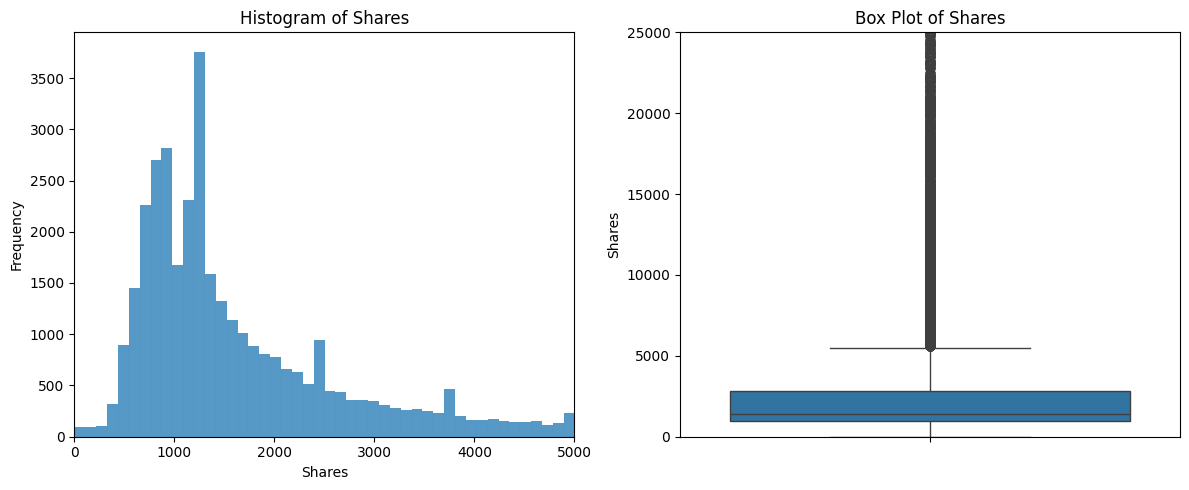

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [357]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with x-axis limited to 5000
sns.histplot(df['shares'], ax=axes[0])
axes[0].set_xlim(0, 5000)  # Set x-axis limit
axes[0].set_title('Histogram of Shares')
axes[0].set_xlabel('Shares')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(y=df['shares'], ax=axes[1])
axes[1].set_title('Box Plot of Shares')
axes[1].set_ylabel('Shares')
axes[1].set_ylim(0, 25000)  # Set y-axis limit

plt.tight_layout()
plt.show()

df['shares'].describe()

The distribution is right-skewed, with most observations falling between 500 and 2000 shares.
The median value is around 1400 shares, with a few outliers extending up to 25,000.

In [358]:
# numeric variables
numeric = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

# Loop through each numeric feature and remove outliers
for feature in numeric:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

## Bivariate Analysis



In [359]:
# List of content-based features with target variable
content_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
                    'n_non_stop_words', 'n_non_stop_unique_tokens','average_token_length', 'num_keywords','shares']

# Create a new DataFrame with only content-based features
df_content_based = df[content_features]


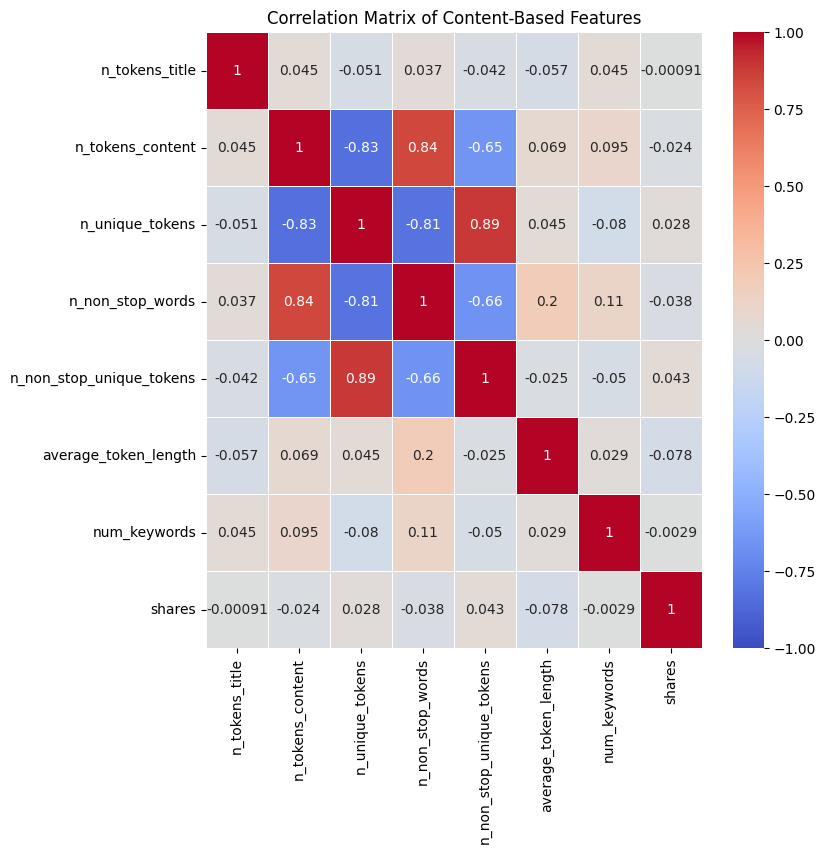

In [360]:
# Compute the correlation matrix
corr_matrix = df_content_based.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set the title
plt.title('Correlation Matrix of Content-Based Features')

# Display the plot
plt.show()

- Since 'n_unique_tokens' , 'n_non_stop_words', and 'n_non_stop_unique_tokens' are all more correlated and to avoid multicollinearity. we can keep one of them because they essentially contain the same information.

- Among the rest 'n_tokens_title' and 'n_unique_tokens' are showing slightly stronger correlation, that says ariticle having more words are tend to have more shares.

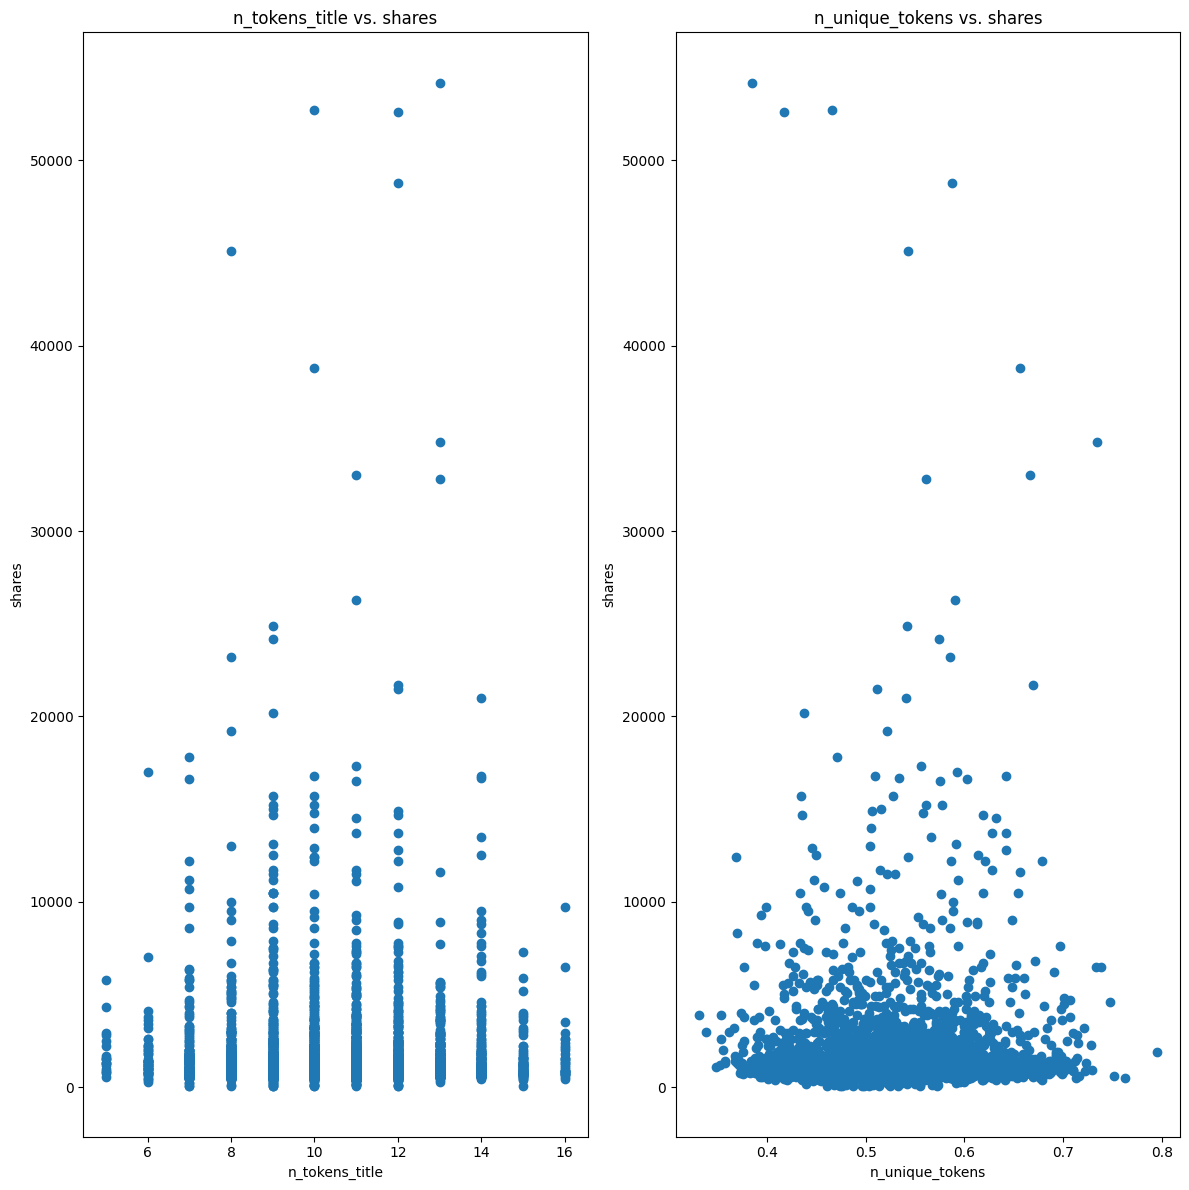

In [361]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Scatter plot of n_tokens_title vs. shares
axes[0].scatter(df['n_tokens_title'], df['shares'])
axes[0].set_title('n_tokens_title vs. shares')
axes[0].set_xlabel('n_tokens_title')
axes[0].set_ylabel('shares')

# Scatter plot of n_unique_tokens vs. shares
axes[1].scatter(df['n_unique_tokens'],  df['shares'])
axes[1].set_title('n_unique_tokens vs. shares')
axes[1].set_xlabel('n_unique_tokens')
axes[1].set_ylabel('shares')

# Display the plots
plt.tight_layout()
plt.show()

- The scatter plots show that for both `n_tokens_title`( Number of words in the article's title )and `n_unique_tokens`,(Rate of unique words in the content) there is no clear linear relationship with `shares`. Most data points for `n_unique_tokens` are concentrated at very low values, while both features seem to have scattered points with no strong trend in relation to the number of shares, indicating very weak correlations.

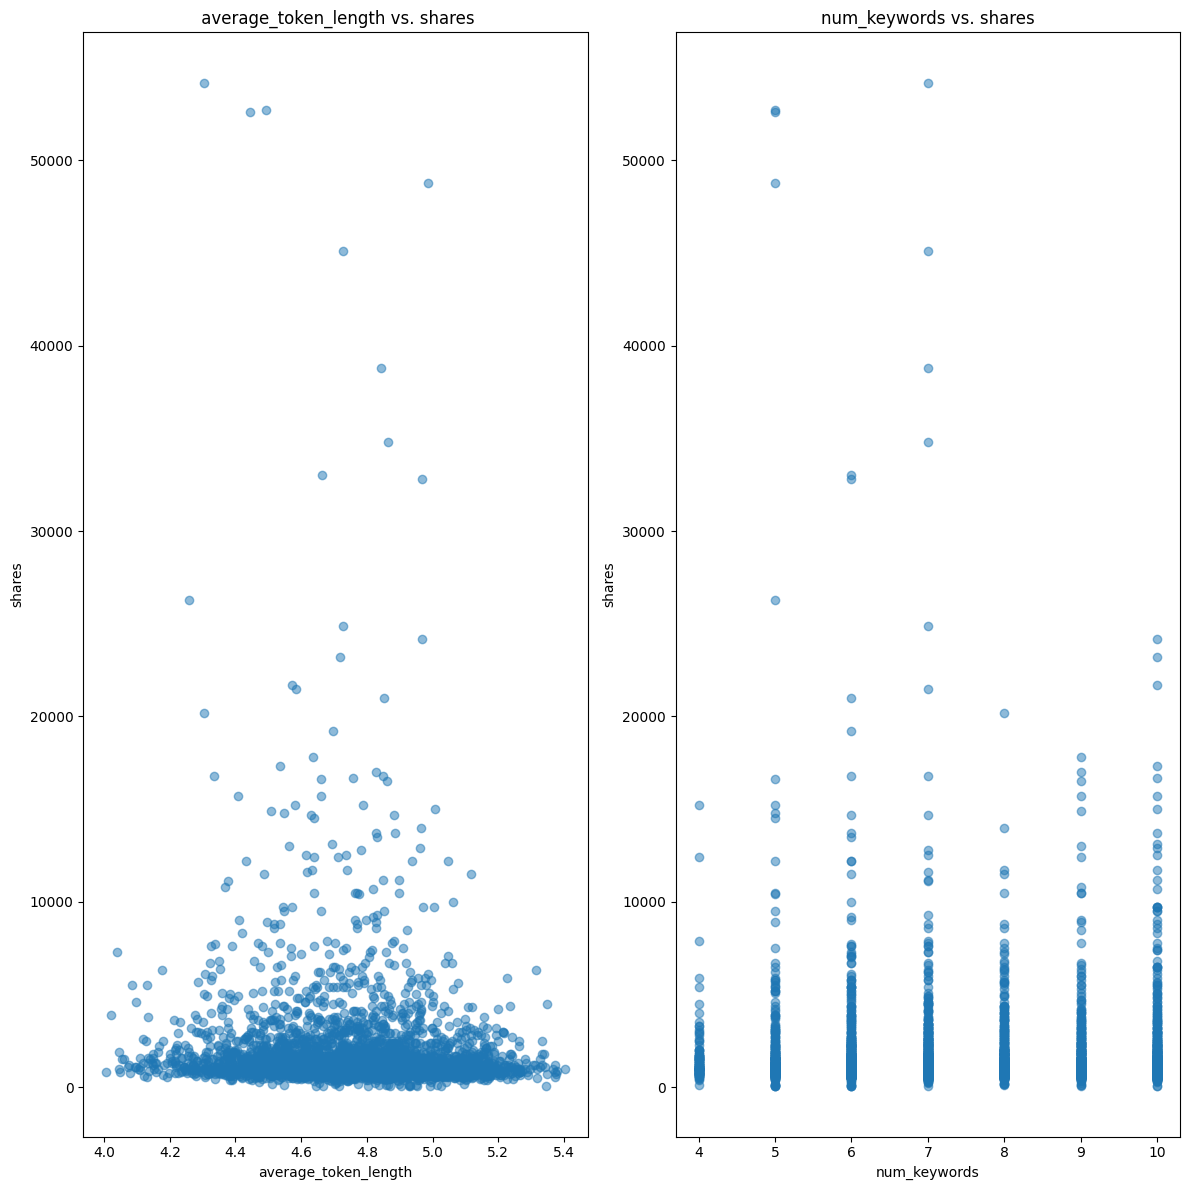

In [362]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Scatter plot of  vs. shares
axes[0].scatter(df['average_token_length'], df['shares'], alpha=0.5)
axes[0].set_title(' average_token_length vs. shares')
axes[0].set_xlabel('average_token_length')
axes[0].set_ylabel('shares')

# Scatter plot of n_unique_tokens vs. shares
axes[1].scatter(df['num_keywords'], df['shares'], alpha=0.5)
axes[1].set_title('num_keywords vs. shares')
axes[1].set_xlabel('num_keywords')
axes[1].set_ylabel('shares')

# Display the plots
plt.tight_layout()
plt.show()

In [363]:
# Select the relevant columns for link and multimedia features with target variable
link_multimedia_features = df[['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos','shares']].copy()

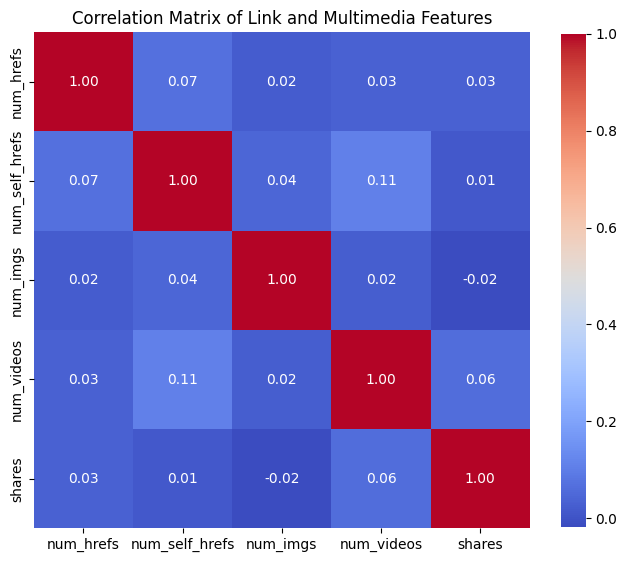

In [364]:
# Calculate the correlation matrix
correlation_matrix = link_multimedia_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix of Link and Multimedia Features')

# Show the plot
plt.show()

- Features like 'num_href'( Number of hyperlinks in the article) , 'num_videos'( Number of videos in the article) are showing strong collinearity to shares indicating that aritcle with more number of relevent citations and videos are shared more.

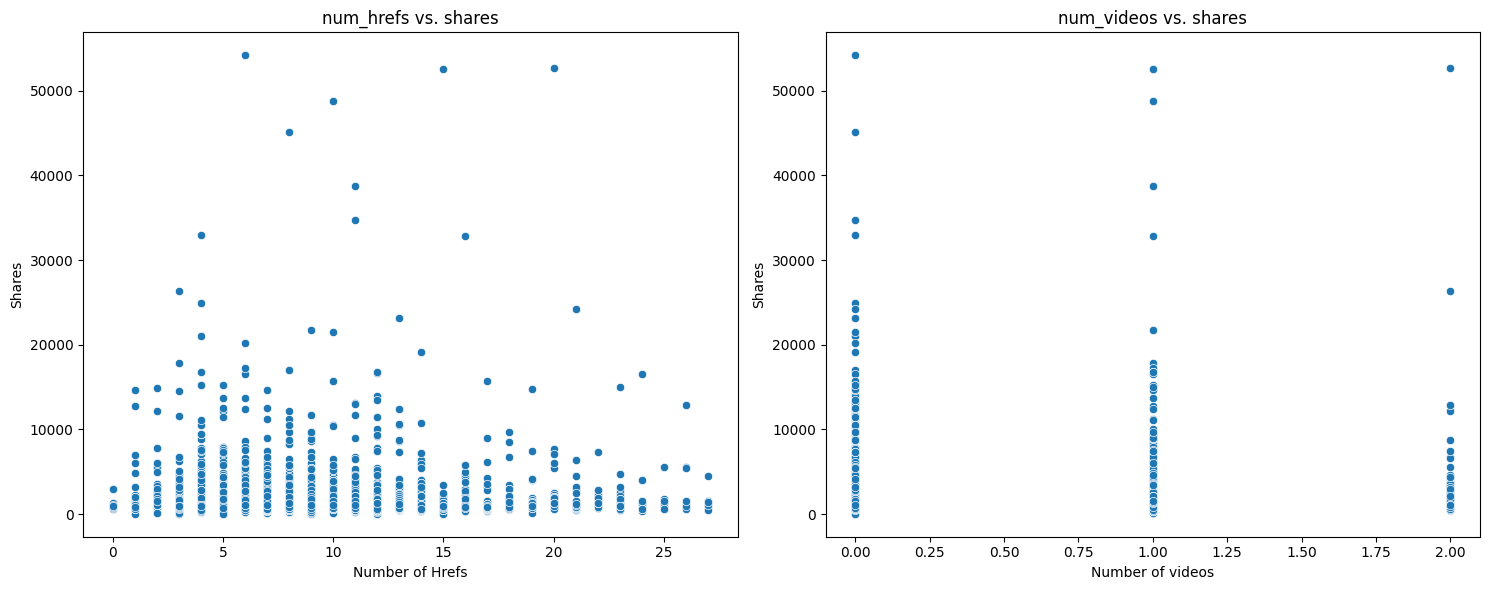

In [365]:
# Set the figure size for better readability
plt.figure(figsize=(15, 6))

# Create a subplot for num_hrefs vs shares
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=link_multimedia_features, x='num_hrefs', y='shares')
plt.title('num_hrefs vs. shares')
plt.xlabel('Number of Hrefs')
plt.ylabel('Shares')

# Create a subplot for num_videos vs shares
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=link_multimedia_features, x='num_videos', y='shares')
plt.title('num_videos vs. shares')
plt.xlabel('Number of videos')
plt.ylabel('Shares')

# Show the plots
plt.tight_layout()
plt.show()

- As the number of links and videos increases in an article it is tend to more sharable

Text(0, 0.5, 'Shares')

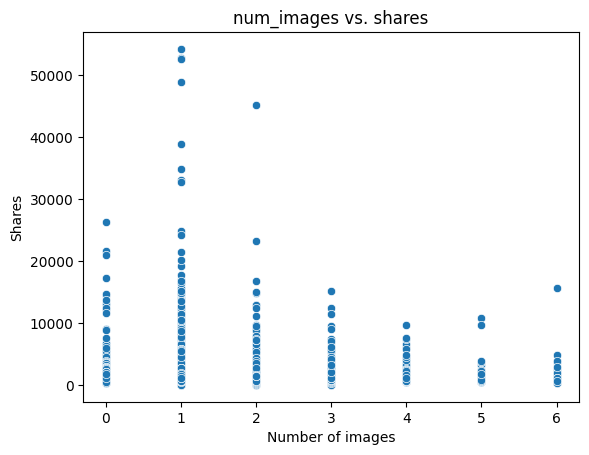

In [366]:
sns.scatterplot(data=link_multimedia_features, x='num_imgs', y='shares')
plt.title('num_images vs. shares')
plt.xlabel('Number of images')
plt.ylabel('Shares')

- Articles with less images are tend to share less. As it might be not engaging.

In [367]:
sentiment_features = [
    'global_subjectivity',
    'global_sentiment_polarity',
    'global_rate_positive_words',
    'global_rate_negative_words',
    'rate_positive_words',
    'rate_negative_words',
    'avg_positive_polarity',
    'min_positive_polarity',
    'max_positive_polarity',
    'avg_negative_polarity',
    'min_negative_polarity',
    'max_negative_polarity',
    'title_subjectivity',
    'title_sentiment_polarity',
    'abs_title_subjectivity',
    'abs_title_sentiment_polarity',
    'shares'
]

# Create a new DataFrame with only the sentiment polarity features
df_sentiment_polarity = df[sentiment_features].copy()

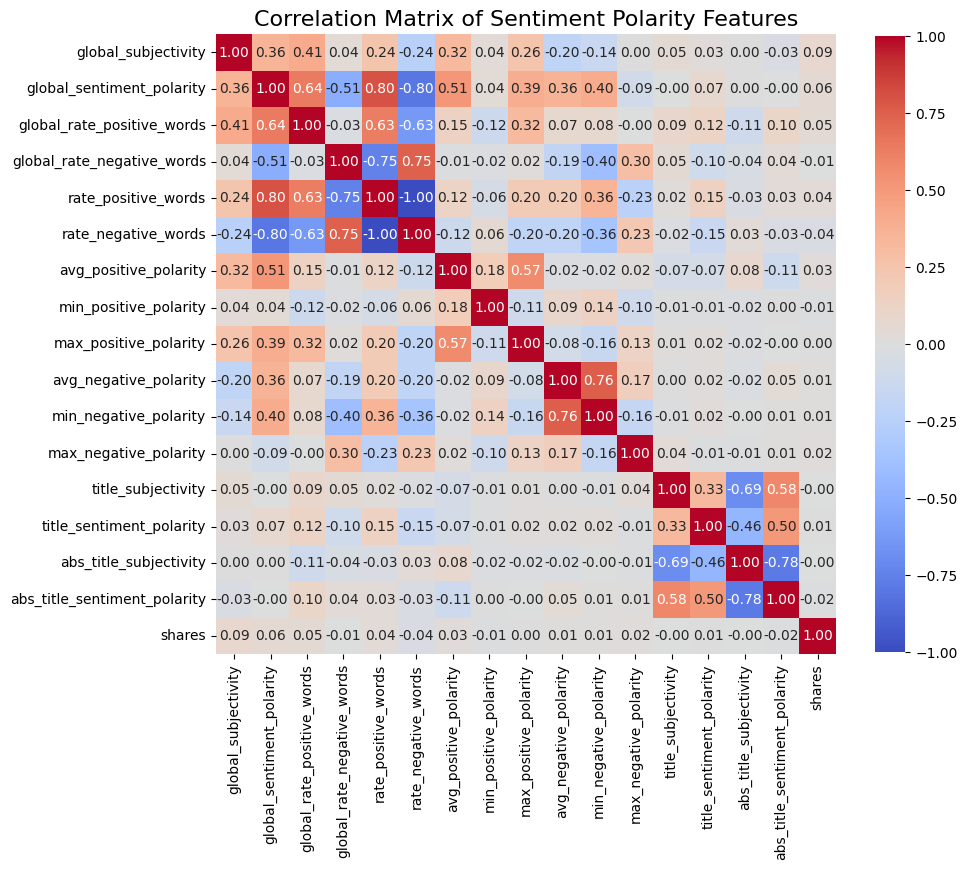

In [368]:
# Calculate the correlation matrix
correlation_matrix = df_sentiment_polarity.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix of Sentiment Polarity Features', fontsize=16)

# Show the plot
plt.show()

- Here are the features with correlation values greater than 0.5:

- global_rate_negative_words and rate_negative_words:
corr = 0.75

- avg_positive_polarity and max_positive_polarity:
corr = 0.57

- avg_negative_polarity and min_negative_polarity:
corr
= 0.76

- title_subjectivity and abs_title_subjectivity:
corr = 0.58

None of the sentiment polarity features show a strong correlation with shares. Most correlations are very weak, suggesting that the features related to sentiment do not strongly influence the number of shares. The correlations range between -0.09 and 0.06, indicating only marginal or negligible relationships between these features and shares.


## Feature Selection

In [369]:
import statsmodels.api as sm
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.simplefilter("ignore")

In [370]:
# Features
X = df.drop(columns=['url', 'timedelta','shares'])
# Target variable
y = df['shares']

# Add a constant for the intercept
X = sm.add_constant(X)
# Fit the initial model
model = sm.OLS(y, X).fit()

# Initialize lists to store metrics
metrics = {'AIC': [], 'R_squared': []}

p_value_threshold = 0.05
# Backward selection
while len(X.columns) > 1:
    metrics['AIC'].append(model.aic)
    metrics['R_squared'].append(model.rsquared)
    #metrics['Accuracy'].append(model.Accuracy)

    # Get p-values
    p_values = model.pvalues

    if p_values.max() > p_value_threshold:
       # Drop the feature with the highest p-value
       X = X.drop(p_values.idxmax(), axis=1)
    else :
      break
    # Fit the new model
    model = sm.OLS(y, X).fit()

# Final model metrics
metrics['AIC'].append(model.aic)
metrics['R_squared'].append(model.rsquared)

-  The feature with the highest p-value is less than or equal to a predetermined threshold (commonly 0.05). This means that all remaining features are statistically significant, and removing any would result in a model that may not adequately explain the variance in the target variable.
[reference code](https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/?source=post_page-----f0d352b346f--------------------------------)

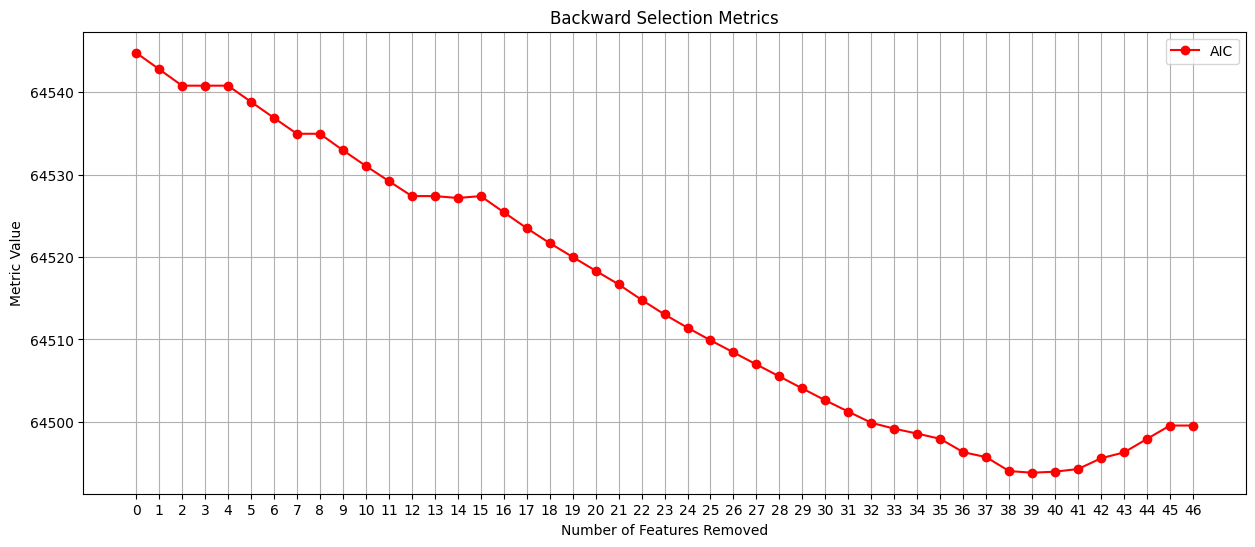

In [371]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(metrics['AIC'], marker='o', label='AIC', color='red')
#plt.plot(metrics['R_squared'], marker='o', label='R²', color='blue')

plt.title('Backward Selection Metrics')
plt.xlabel('Number of Features Removed')
plt.ylabel('Metric Value')
plt.xticks(range(len(metrics['AIC'])), range(len(metrics['AIC'])))
plt.legend()
plt.grid()
plt.show()

- Lower AIC values indicate a better-fitting model, meaning it has a good balance between goodness of fit and complexity.
When comparing models, the model with the lowest AIC is generally preferred.

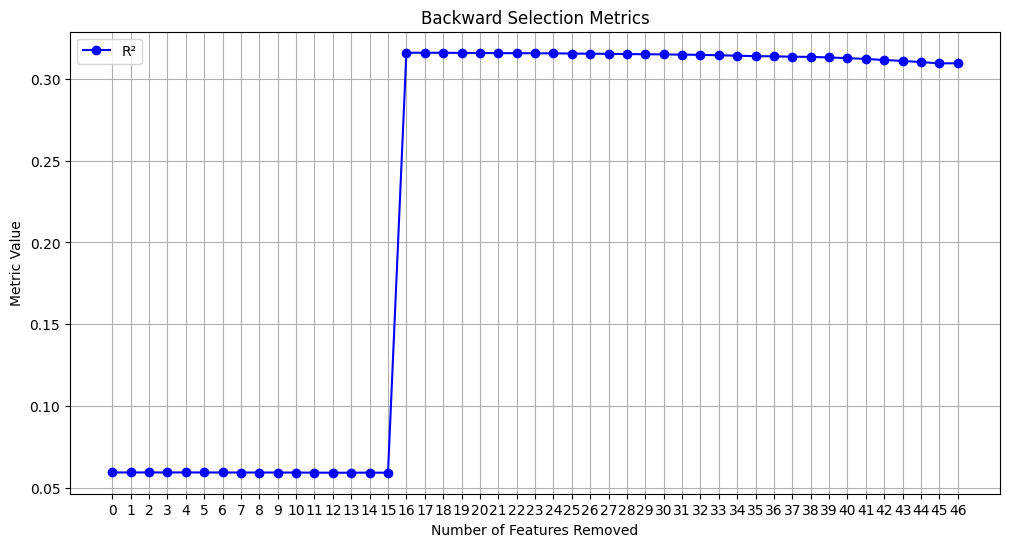

In [372]:
# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(metrics['AIC'], marker='o', label='AIC', color='red')
plt.plot(metrics['R_squared'], marker='o', label='R²', color='blue')

plt.title('Backward Selection Metrics')
plt.xlabel('Number of Features Removed')
plt.ylabel('Metric Value')
plt.xticks(range(len(metrics['AIC'])), range(len(metrics['AIC'])))
plt.legend()
plt.grid()
plt.show()

- Key feature removal around the 15th and 16th features is critical for improving the model's performance.

- After this point, the model stabilizes and maintains a high R² value even as more features are removed, implying that a simpler model with fewer features is optimal without sacrificing performance.







In [373]:
# List of retained features
retained_features = X.columns.tolist()
print("Retained Features:", retained_features)

Retained Features: ['n_non_stop_unique_tokens', 'num_hrefs', 'num_videos', 'average_token_length', 'data_channel_is_lifestyle', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_avg', 'kw_avg_avg', 'self_reference_avg_sharess', 'is_weekend', 'LDA_01', 'global_subjectivity']


## Regression Model

In [374]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np

In [375]:
X = df[retained_features]  # Features
y = df['shares']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gets shape of test and training data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {y_train.shape}")
print(f"Shape of Y_test: {y_test.shape}")



Shape of X_train: (2732, 13)
Shape of X_test: (683, 13)
Shape of Y_train: (2732,)
Shape of Y_test: (683,)


In [376]:
# Initialize the linear regression model
model = LinearRegression()

# Define the k-fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for linear regression model
scores_m1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("Cross-Validation Scores for linear regression model:", scores_m1)
print("Accuracy for linear regression model:", np.mean(scores_m1))


Cross-Validation Scores for linear regression model: [0.04098142 0.05794755 0.00147679 0.04025794 0.04240612]
Accuracy for linear regression model: 0.036613961977425946


In [395]:
# create Ridge Regression model with alpha 1
ridge_reg = Ridge(alpha=6)

# Define the k-fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for linear regression model
scores_m1 = cross_val_score(ridge_reg, X_train, y_train, cv=kf, scoring='r2')

print("Cross-Validation Scores for linear regression model:", scores_m1)
print("Accuracy for linear regression model:", np.mean(scores_m1))


Cross-Validation Scores for linear regression model: [0.04184037 0.05983497 0.00288798 0.03923285 0.04233572]
Accuracy for linear regression model: 0.03722637839993048


## Conclusion
- From EDA we could see some pattrens like having more keywords or article with more videos and links to other citations are tend to share more.

- After doing backward selection we endup having 13 features in the dataset.

- We have taken two models, in which ridge regression shows comparitively better performance with respect to r2 scores.